<p style="color: #000000; font-size: 32px; font-weight: bold; text-align: center; margin-top: 20px;"> 
Sure Tomorrow
</p>
<p style="color: #000000; font-size: 24px; text-align: center; margin-bottom: 20px;">
Prediction Model for the Insurance Company
</p>

<hr style="border: .4px solid #000000; width: 65%; margin: 10px auto;">

<p style="color: #000000; font-size: 18px;">
The insurance company Sure Tomorrow is looking to improve its operations using machine learning. Through this approach, the company hopes to optimize various tasks, from marketing to predicting events related to customers.
</p>

<p style="color: #000000; font-size: 20px; font-weight: bold;">Project Goal:</p>
<p style="color: #000000; font-size: 18px;">
The goal of this project is to develop several predictive models to solve key tasks that will help the company improve decision-making and optimize its internal processes.
</p>

<p style="color: #000000; font-size: 20px; font-weight: bold;">Project Objectives:</p>
<ul style="color: #000000; font-size: 18px;">
<li><strong>Task 1: Find Similar Customers:</strong> Use machine learning to identify customers with profiles similar to a given customer, assisting agents in their marketing strategies.</li>
<li><strong>Task 2: Predict Benefit Probability:</strong> Develop a model to predict the probability that a new customer will receive an insurance benefit, comparing the performance of a predictive model with a dummy model.</li>
<li><strong>Task 3: Predict the Number of Benefits:</strong> Create a linear regression model to estimate the number of benefits that a new customer may receive.</li>
<li><strong>Task 4: Data Masking:</strong> Develop an algorithm to protect customers' personal data using data masking or obfuscation techniques, without affecting the quality of the predictive model.</li>
</ul>


# Data Preprocessing and Exploration

## 1.Initialization


In [44]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler

from IPython.display import display

## 2. Load the Data

The DataFrame is structured as follows:   

**Features**:   
* `Gender`   
* `Age`   
* `Salary`   
* `Family members`   
* `Insurance benefits`    

**Target**:   
* `Insurance benefits`

In [46]:
df = pd.read_csv('insurance_us.csv')
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Rename the columns to snake_case format.

In [47]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})
print(df.columns.tolist())

['gender', 'age', 'income', 'family_members', 'insurance_benefits']


In [48]:
# Initial review of the DataFrame
df.info()

# Random sample of 10 rows
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,gender,age,income,family_members,insurance_benefits
1262,0,30.0,46900.0,0,0
1834,0,21.0,31700.0,0,0
737,1,27.0,54900.0,1,0
2158,0,26.0,36000.0,0,0
2936,0,38.0,45600.0,3,0
2122,0,18.0,45800.0,0,0
4564,0,20.0,42200.0,1,0
554,1,30.0,56100.0,1,0
3226,1,43.0,38500.0,1,1
3316,1,18.0,27000.0,1,0


**Information Observations:**  
- There are no missing values in any column.  
- The `'age'` column is in float format (`float64`), but since it represents years, it could be converted to `int64` for better precision.  
- The columns `'gender'`, `'family_members'`, and `'insurance_benefits'` are integers (`int64`), which is appropriate for their categories.  

**Sample Observations:**  
- A random sample of 10 rows has been selected from the DataFrame.  
- `'gender'` is encoded as 0 and 1 (0 = male, 1 = female).  
- `'age'` contains float values (it could be converted to integer if necessary).  
- `'income'` shows various annual salary values.  
- `'family_members'` indicates the number of family members.  
- `'insurance_benefits'` shows how many insurance benefits the person has received (0 and 1 values in this sample).

In [49]:
# Convert 'age' dtype to int64
df['age'] = df['age'].astype('int64')

# Check the conversion
print(df['age'].dtype)

int64


In [50]:
# Descriptive statistics of the data
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Distribution of the Columns**   

**`gender`**: The genders are balanced, with a distribution almost **50-50**.   

**`age`**: The average age is **31 years**. The age range is from **18** to **65 years**.   

**`income`**: The average income is around **40,000**. The minimum income is **5,300**, and the maximum is **79,000**.   

**`family_members`**: The number of family members ranges from **0** to **6**. The average number of family members per family is **1.09**.   

**`insurance_benefits`**: The average is **0.148**, indicating that most people do not have insurance benefits. More than **75%** of customers do not have insurance benefits.  

## 3. Exploratory Data Analysis (EDA)

Let's quickly check if there are any distinct customer groups by observing the pairplot.

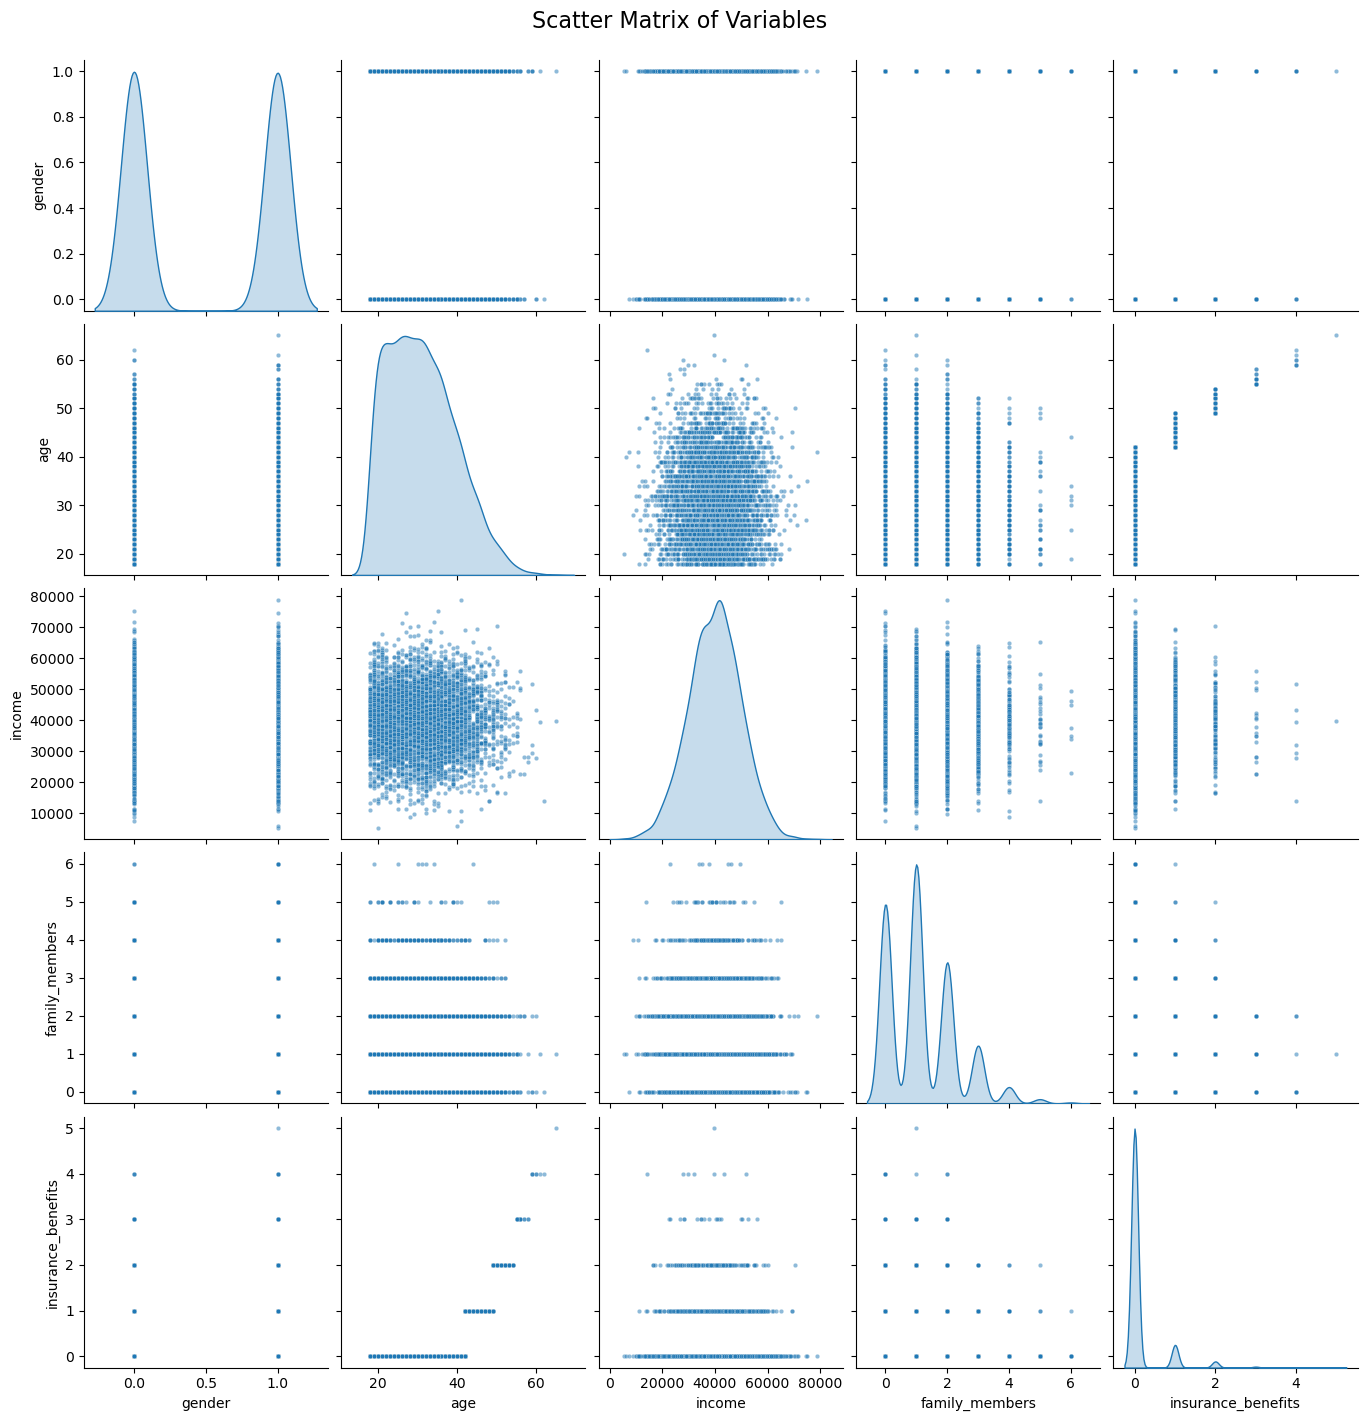

In [51]:
# Create the pairplot with scatterplots and KDE on the diagonal
g = sns.pairplot(
    df, 
    kind='scatter',  # Use scatterplot for variable relationships
    diag_kind='kde',  # Use density distribution on the diagonal
    plot_kws={'alpha': 0.5, 's': 10},  # Adjust transparency and point size
    diag_kws={'fill': True}  # Use 'fill' instead of 'shade'
)

# Adjust figure size
g.fig.set_size_inches(14, 14)

# Add title
plt.suptitle("Scatter Matrix of Variables", fontsize=16, y=1.02)

# Show the plot
plt.show()

The conclusion that there are no clearly defined clusters, but some indications of segmentation, is based on the patterns observed in the scatter matrix. In the relationship between **age** and **income**, there is a concentration of points in the middle age range (30-50 years) with intermediate incomes, suggesting that income may increase with age, although no clear groups are formed. Regarding the number of **family_members**, customers have discrete values (0, 1, 2, 3...), which may indicate potential segmentation based on this factor. Additionally, the **insurance_benefits** variable shows a concentration in low values, suggesting that segmentation might be related to those with fewer benefits, although some customers with more benefits might be distinguished by characteristics like **income** or **age**. For more precise segmentation, it would be helpful to apply clustering techniques like KMeans or DBSCAN.

Detecting clear groups (clusters) is challenging due to the difficulty of combining various variables simultaneously to analyze multivariate distributions. In this regard, the use of machine learning (ML) techniques and linear analysis (LA) can be quite useful for obtaining more effective segmentation.

# Task 1: Similar Customers

In machine learning, it is necessary to develop a procedure that returns the k nearest neighbors (objects) for a given object based on the distance between the objects.

To solve this task, we can test different distance metrics.

Now, let's **write a function** that returns the **K Nearest Neighbors** for a given object, based on a specified distance metric. When performing this task, the number of insurance benefits received should not be taken into account.

**Tests will be conducted with the following metrics**:
   - **Distance metrics**:
     - **Euclidean**.
     - **Manhattan**.
   - **Data scaling**:
     - **Unscaled data**.
     - **Scaled data** using the [**MaxAbsScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html).

**The following questions will be answered**:
   - Does the fact that the data is not scaled affect the kNN algorithm? If so, how is this manifested?
   - How similar are the results when using the Manhattan distance metric (regardless of scaling)?

In [52]:
# Features columns 
features = ['gender', 'age', 'income', 'family_members']

In [53]:
# Function to find the k nearest neighbors using KNN
def get_knn(df, n, k, metric):
    
    """
    Returns the k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within the same place    
    :param n: number of objects for which the nearest neighbors are sought    
    :param k: number of nearest neighbors to return
    :param metric: name of the distance metric    
    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[features].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][features]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

**Scale data**

In [54]:
# Convert the columns to float64 before scaling
df[features] = df[features].astype('float64')

# Apply MaxAbsScaler()
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[features].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, features] = transformer_mas.transform(df[features].to_numpy())
# Scaled DF
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
452,0.0,0.523077,0.415190,0.000000,0
187,1.0,0.476923,0.551899,0.000000,0
413,1.0,0.692308,0.502532,0.000000,1
2859,0.0,0.415385,0.551899,0.666667,0
2762,0.0,0.292308,0.641772,0.166667,0


Now, let's retrieve similar records (nearest neighbors) for a specific client (object) in df_scaled, using the `get_knn` function we defined earlier.  
We will select client 14, using **n=13** to find the **k=10** most similar ones.

**Not Scaled Euclidean**

In [55]:
euc = get_knn(df[features], 13, 11, 'euclidean')
euc

,gender,age,income,family_members,distance
13,0.0,21.0,55000.0,0.0,0.000000
3601,0.0,19.0,55000.0,0.0,2.000000
2893,0.0,25.0,55000.0,4.0,5.656854
558,0.0,26.0,55000.0,5.0,7.071068
214,0.0,32.0,55000.0,2.0,11.180340
4634,0.0,35.0,55000.0,1.0,14.035669
1637,0.0,39.0,55000.0,1.0,18.027756
1996,1.0,46.0,55000.0,2.0,25.099801
340,0.0,52.0,55000.0,1.0,31.016125
1448,0.0,20.0,54900.0,1.0,100.010000


**Scaled Euclidean**

In [56]:
euc_s = get_knn(df_scaled[features], 13, 11, 'euclidean')
euc_s

,gender,age,income,family_members,distance
13,0.0,0.323077,0.696203,0.0,0.000000
1967,0.0,0.323077,0.678481,0.0,0.017722
4192,0.0,0.338462,0.705063,0.0,0.017754
2716,0.0,0.307692,0.707595,0.0,0.019143
2919,0.0,0.338462,0.716456,0.0,0.025434
3601,0.0,0.292308,0.696203,0.0,0.030769
818,0.0,0.338462,0.667089,0.0,0.032929
2183,0.0,0.292308,0.711392,0.0,0.034314
4498,0.0,0.292308,0.668354,0.0,0.041500
620,0.0,0.292308,0.667089,0.0,0.042360


**Not Scaled Manhattan**

In [57]:
man = get_knn(df[features], 13, 11, 'manhattan')
man

,gender,age,income,family_members,distance
13,0.0,21.0,55000.0,0.0,0.0
3601,0.0,19.0,55000.0,0.0,2.0
2893,0.0,25.0,55000.0,4.0,8.0
558,0.0,26.0,55000.0,5.0,10.0
214,0.0,32.0,55000.0,2.0,13.0
4634,0.0,35.0,55000.0,1.0,15.0
1637,0.0,39.0,55000.0,1.0,19.0
1996,1.0,46.0,55000.0,2.0,28.0
340,0.0,52.0,55000.0,1.0,32.0
1448,0.0,20.0,54900.0,1.0,102.0


**Scaled Manhattan**

In [58]:
man_s = get_knn(df_scaled[features], 13, 11, 'manhattan')
man_s

,gender,age,income,family_members,distance
13,0.0,0.323077,0.696203,0.0,0.000000
1967,0.0,0.323077,0.678481,0.0,0.017722
4192,0.0,0.338462,0.705063,0.0,0.024245
2716,0.0,0.307692,0.707595,0.0,0.026777
3601,0.0,0.292308,0.696203,0.0,0.030769
2919,0.0,0.338462,0.716456,0.0,0.035638
818,0.0,0.338462,0.667089,0.0,0.044499
2183,0.0,0.292308,0.711392,0.0,0.045959
2604,0.0,0.276923,0.697468,0.0,0.047420
4498,0.0,0.292308,0.668354,0.0,0.058617


**Do unscaled data affect the kNN algorithm? If so, how does it manifest?**

Yes, it affects. The kNN algorithm is based on the distances between points, and if the features have different scales, those with larger values will dominate the distance calculation, causing a disproportion and leading to biased results. In this case, the `income` feature would dominate over `age` and `family_members`. On the other hand, **with scaled data, all features contribute more equally to the distance calculation**.

**How similar are the results when using the Manhattan distance metric (regardless of scaling)?**

Data scaling significantly affects the Manhattan distance metric because, without scaling, features with larger magnitudes, such as `income`, dominate the distance, while with scaling, all features contribute more equally, altering the order of the nearest neighbors. Therefore, the decision to scale or not should depend on the relative importance of the features in the algorithm's objective.

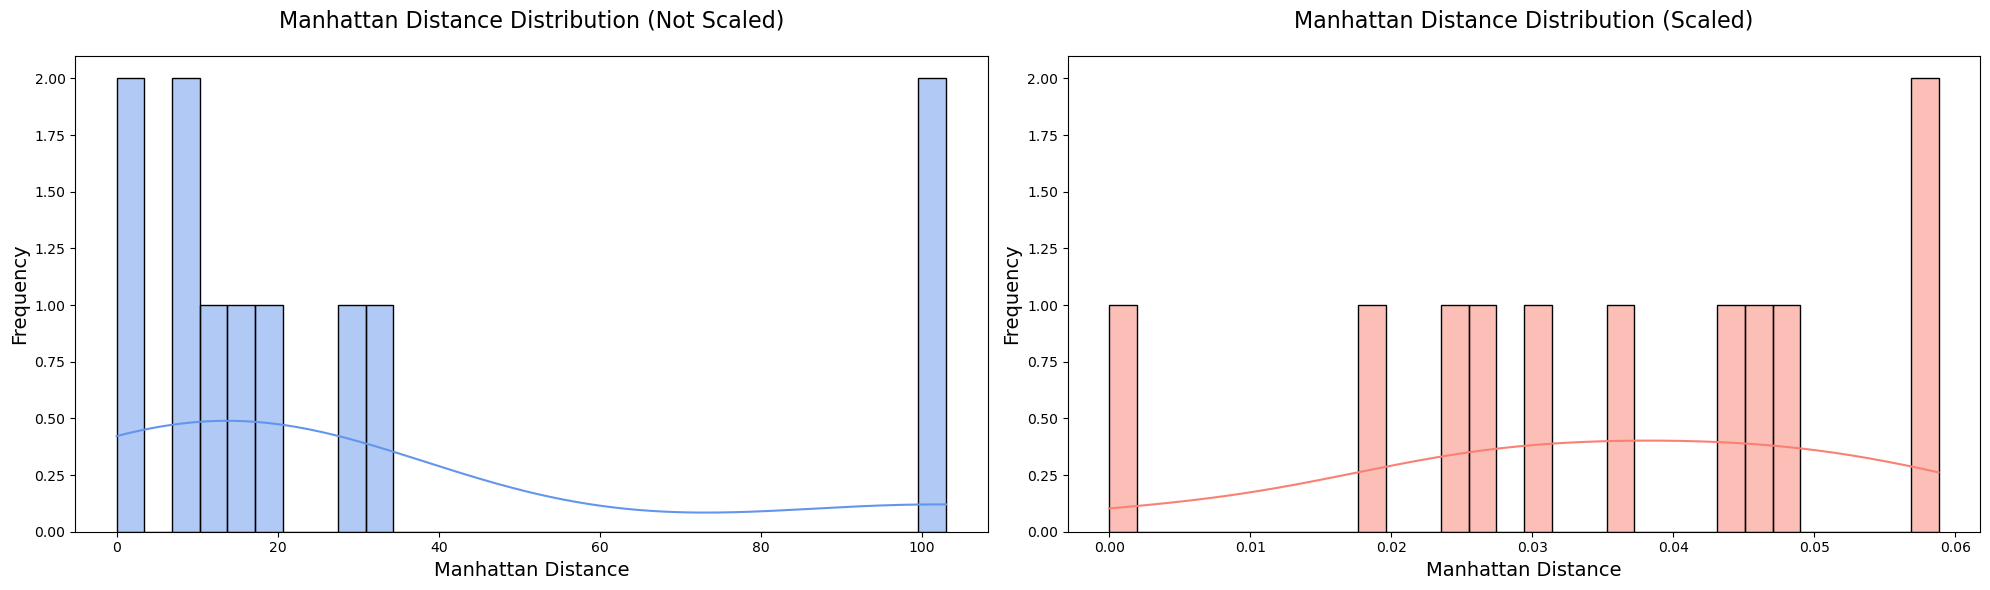

In [59]:
# Create a figure with scaled and not scaled Manhattan
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram (Manhattan Not Scaled)
sns.histplot(man.distance, color='cornflowerblue', bins=30, kde=True, edgecolor='black', ax=axes[0])
axes[0].set_title('Manhattan Distance Distribution (Not Scaled)', fontsize=16, pad=20)
axes[0].set_xlabel('Manhattan Distance', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Plot the second histogram (Manhattan Scaled)
sns.histplot(man_s.distance, color='salmon', bins=30, kde=True, edgecolor='black', ax=axes[1])
axes[1].set_title('Manhattan Distance Distribution (Scaled)', fontsize=16, pad=20)
axes[1].set_xlabel('Manhattan Distance', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

In this example, we can see that by scaling the data, all features contribute equally to the distance calculation, preventing variables with large values from dominating the result.

# Task 2. Is it likely that the client will receive an insurance benefit?

In terms of machine learning, we can consider this a binary classification task.  
We evaluate whether the **kNN** classification approach can improve performance compared to a **dummy** model, with the target being **insurance_benefits** greater than zero. To do this, we first build the **kNN** classification model, then the **dummy** model, and compare the results obtained from both.

The probability of paying any insurance benefit can be defined as  
$$  
P\{\text{insurance benefit received}\} = \frac{\text{number of clients who have received an insurance benefit}}{\text{total number of clients}}.  
$$

Split all the data into training/test stages, respecting the 70:30 ratio.

In [60]:
# Calculate the target (y)
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0, 0, 1)
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] == 0, 0, 1)

In [61]:
# Check the class imbalance with value_counts()
print('\nNot scaled data\n',df['insurance_benefits_received'].value_counts(normalize=True)) #proporción
print('\nScaled data\n', df_scaled['insurance_benefits_received'].value_counts(normalize=True)) #proporción


Not scaled data
 insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64

Scaled data
 insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64


We can see that 88% have not received at least one insurance benefit.

**Evaluation of a Dummy Model**

We generate random predictions with different probabilities (P) using `rnd_model_predict`. Then, we evaluate the performance with `eval_classifier`, calculating the `F1 score` and the `confusion matrix`. This will serve as a baseline to compare future models.

In [62]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion matrix')
    print(cm)

In [63]:
# Generate the output of a random model
def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [64]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'Probability:: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df[features].shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

Probability:: 0.00
F1: 0.00
Confusion matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

Probability:: 0.11
F1: 0.12
Confusion matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

Probability:: 0.50
F1: 0.20
Confusion matrix
[[0.456  0.4312]
 [0.053  0.0598]]

Probability:: 1.00
F1: 0.20
Confusion matrix
[[0.     0.8872]
 [0.     0.1128]]



The results show that a random model is not effective in predicting the receipt of insurance benefits. Even when the prediction probability is adjusted to the actual data distribution, the F1-score remains low (maximum of 0.20), indicating poor performance in classifying both positive and negative cases.

**Training the kNN model**  
We will use the `train_test_split` parameter with a 70:30 ratio to split the training sets.

**Not Scaled Data**

In [65]:
# Separate target and features  
target = df['insurance_benefits_received']  
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)

# Split the data into training and testing  
features_train, features_valid, target_train, target_valid = train_test_split(  
    features, target, test_size=0.3, random_state=12345)

**Scaled Data**

In [66]:
# Separate the features from the target column  
target_s = df_scaled['insurance_benefits_received']  
features_s = df_scaled.drop(['insurance_benefits_received','insurance_benefits'], axis=1)

# Separate the data variables into training and test variables  
features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split(  
    features_s, target_s, test_size=0.3, random_state=12345)

In [67]:
# Function to find the best K and display the confusion matrix  
def find_best_k(features_train, target_train, features_valid, target_valid, scaled=False):  
    """  
    Finds the best value of k for KNN based on the F1 metric.  
    Also shows the confusion matrix for each k and the best k.  

    :param features_train: Training data  
    :param target_train: Training labels  
    :param features_valid: Validation data  
    :param target_valid: Validation labels  
    :param scaled: Indicates whether the data is scaled or not (for printing only)
    
    :return: Best k found and its F1 score  
    """  
    best_k = None  
    best_f1 = 0  
    best_predictions = None  
    k_values = np.arange(1, 11)  

    for k in k_values:  
        # Create the KNN classifier  
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')  
        knn.fit(features_train, target_train)  
        
        # Make predictions  
        predictions = knn.predict(features_valid)  
        f1 = f1_score(target_valid, predictions)  
        
        # Print the F1 results for each k value  
        print(f'K = {k} -> F1 Score: {f1:.4f}')  
        
        # Save the predictions for the confusion matrix and the best F1  
        if f1 > best_f1:  
            best_f1 = f1  
            best_k = k  
            best_predictions = predictions  

        # Show the confusion matrix for the k value  
        cm = confusion_matrix(target_valid, predictions)  
        print(f'Confusion Matrix for k={k}:')  
        print(cm)  
        print('-' * 30)  

    scaling_status = "Scaled" if scaled else "Not Scaled"  
    
    # Show the best k and its F1 Score  
    print(f'\nBest K for {scaling_status} Data: {best_k} with F1 Score: {best_f1:.4f}')  
    
    # Show the confusion matrix for the best model  
    cm_best = confusion_matrix(target_valid, best_predictions)  
    print(f'Confusion Matrix for the best K (k={best_k}):')  
    print(cm_best)  

    return best_k, best_f1

In [68]:
# Euclidean - Not Scaled Data
print("Evaluation of non-scaled data:\n")
best_k_not_scaled, best_f1_not_scaled = find_best_k(features_train, target_train, features_valid, target_valid, scaled=False)

Evaluation of non-scaled data:

K = 1 -> F1 Score: 0.6065
Confusion Matrix for k=1:
[[1307   30]
 [  79   84]]
------------------------------
K = 2 -> F1 Score: 0.6087
Confusion Matrix for k=2:
[[1308   29]
 [  79   84]]
------------------------------
K = 3 -> F1 Score: 0.5525
Confusion Matrix for k=3:
[[1314   23]
 [  92   71]]
------------------------------
K = 4 -> F1 Score: 0.5242
Confusion Matrix for k=4:
[[1317   20]
 [  98   65]]
------------------------------
K = 5 -> F1 Score: 0.5063
Confusion Matrix for k=5:
[[1323   14]
 [ 103   60]]
------------------------------
K = 6 -> F1 Score: 0.4635
Confusion Matrix for k=6:
[[1321   16]
 [ 109   54]]
------------------------------
K = 7 -> F1 Score: 0.4395
Confusion Matrix for k=7:
[[1326   11]
 [ 114   49]]
------------------------------
K = 8 -> F1 Score: 0.4395
Confusion Matrix for k=8:
[[1326   11]
 [ 114   49]]
------------------------------
K = 9 -> F1 Score: 0.4182
Confusion Matrix for k=9:
[[1326   11]
 [ 117   46]]
---------

In [69]:
# Euclidean - Scaled Data
print("Evaluation of Scaled data:\n")
best_k_scaled, best_f1_scaled = find_best_k(features_train_s, target_train_s, features_valid_s, target_valid_s, scaled=True)

Evaluation of Scaled data:

K = 1 -> F1 Score: 0.9659
Confusion Matrix for k=1:
[[1333    4]
 [   7  156]]
------------------------------
K = 2 -> F1 Score: 0.9659
Confusion Matrix for k=2:
[[1333    4]
 [   7  156]]
------------------------------
K = 3 -> F1 Score: 0.9527
Confusion Matrix for k=3:
[[1334    3]
 [  12  151]]
------------------------------
K = 4 -> F1 Score: 0.9592
Confusion Matrix for k=4:
[[1334    3]
 [  10  153]]
------------------------------
K = 5 -> F1 Score: 0.9497
Confusion Matrix for k=5:
[[1333    4]
 [  12  151]]
------------------------------
K = 6 -> F1 Score: 0.9527
Confusion Matrix for k=6:
[[1334    3]
 [  12  151]]
------------------------------
K = 7 -> F1 Score: 0.9560
Confusion Matrix for k=7:
[[1334    3]
 [  11  152]]
------------------------------
K = 8 -> F1 Score: 0.9460
Confusion Matrix for k=8:
[[1334    3]
 [  14  149]]
------------------------------
K = 9 -> F1 Score: 0.9490
Confusion Matrix for k=9:
[[1335    2]
 [  14  149]]
-------------

There is no difference in the results with scaled or non-scaled data.  
The best K is 2.

In [70]:
# Set model with the best value of K (k=2 in this case)  
# Using the KNN classifier with the Euclidean distance metric  
# and distance weighting  
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='euclidean', p=2)  

# Train the model with the training data (features_train and target_train)  
neigh.fit(features_train, target_train)  

# Make predictions with the trained model using the validation data  
predictions = neigh.predict(features_valid)

In [71]:
# Confusion matrix generator function and F1 score calculation  
def eval_classifier(y_true, y_pred):  
    """  
    This function evaluates the classifier's performance  
    by calculating the F1 score and displaying the normalized confusion matrix.  
    
    :param y_true: True labels (validation data)  
    :param y_pred: Model predictions  
    """  
    # Calculate the F1 score using the true labels and predictions  
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)  
    print(f'F1: {f1_score:.2f}')  
    
    # Calculate the normalized confusion matrix  
    # 'normalize='all'' calculates the proportions instead of the absolute counts  
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')  
    print('\nConfusion Matrix')  
    print(cm)  

# Call the function to evaluate the model with validation data  
eval_classifier(target_valid, predictions)

F1: 0.61

Confusion Matrix
[[0.872      0.01933333]
 [0.05266667 0.056     ]]


**F1 Score**: 61%, indicating a good balance between precision and recall.  
**Confusion Matrix**:  
**87.20%** of the cases were correctly classified as negative.  
**1.93%** were false positives (real negatives classified as positive).  
**5.27%** were false negatives (real positives classified as negative).  
**5.60%** were true positives correctly identified.  

Overall, the model performs well in identifying negative cases.

**Conclusion**.  
The **Euclidean distance-based model (Euclidean - Not Scaled Data)** is clearly superior to the **dummy model**. With an **F1-score of 0.61**, it significantly outperforms the dummy model's best F1-score (0.20). Additionally, its confusion matrix shows a better balance: it correctly classifies **87.2%** of the negatives (compared to 88.72% for the dummy), reduces false positives to only **1.93%** (compared to 43.12% for the dummy), and improves positive identification with **5.60%** true positives. In conclusion, the Euclidean model is more accurate and reliable for classifying both classes.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what the RMSE of a linear regression model would be.

Build your own implementation of linear regression. To do this, recall how the solution to the linear regression task is formulated in terms of Linear Algebra (LA). Check the RMSE for both the original and scaled data. Can you see any difference in the RMSE between these two cases?

Let us denote:
- \( X \): feature matrix; each row is a case, each column is a feature, the first column is made of ones
- \( y \): target (a vector)
- \( \hat{y} \): predicted target (a vector)
- \( w \): weights vector

The linear regression task in matrix language can be formulated as:
$$
y = Xw
$$

The training objective is then to find that \( w \) that minimizes the L2 distance (MSE) between \( Xw \) and \( y \):
$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

There seems to be an analytical solution to the above:
$$
w = (X^T X)^{-1} X^T y
$$

The above formula can be used to find the weights \( w \), and these can be used to compute the predicted values:
$$
\hat{y} = X_{val}w
$$

Split all the data into training/test stages, respecting the 70:30 ratio. Use the RMSE metric to evaluate the model.

In [72]:
# Function to calculate Root Mean Squared Error (RMSE)  
# and Mean Squared Error (R²)  
def eval_regressor(y_true, y_pred):  
    # Calculate the Root Mean Squared Error (RMSE)  
    # RMSE measures the average deviation between predictions and actual values  
    # The lower the RMSE, the better the model  
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))  
    
    # Print the RMSE value with two decimals  
    print(f'RMSE: {rmse:.2f}')  
    
    # Calculate the R² coefficient of determination  
    # R² measures the proportion of variance in the output data explained by the model  
    # A value closer to 1 indicates that the model explains the data well  
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)  
    
    # Print the R² value with two decimals  
    print(f'R²: {r2_score:.2f}')

In [73]:
class MyLinearRegression:
    def __init__(self):
        # Initialize the object, the weights will be None until they are adjusted during training
        self.weights = None
    
    def fit(self, X, y):
        # Add a column of ones to X to include the intercept term (bias)
        # This is done by concatenating a column of ones at the beginning of the matrix X
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Calculate the weights using the normal equation of linear regression
        # The equation is: w = (X^T * X)^(-1) * X^T * y
        self.weights = (np.linalg.inv(X2.T @ X2) @ X2.T) @ y

    def predict(self, X):
        # Add a column of ones to X for prediction (like during fitting)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) 
        
        # Make predictions by multiplying X2 by the weights obtained during training
        y_pred = X2.dot(self.weights)
        
        # Return the predictions
        return y_pred

In [74]:
# Function to calculate Root Mean Squared Error (RMSE)
# and R², and display their values
def eval_regressor(y_true, y_pred):
    
    # Calculate the Root Mean Squared Error (RMSE)
    # RMSE is a metric that evaluates how close the predictions are to the actual values.
    # The lower the RMSE, the better the model's prediction.
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Print the RMSE value with two decimals.
    print(f'RMSE: {rmse:.2f}')
    
    # Calculate the R² coefficient of determination (no square root is needed here)
    # R² measures the percentage of variance in the dependent variable explained by the model.
    # A value of R² close to 1 indicates that the model fits the data well.
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    
    # Print the R² value with two decimals.
    print(f'R²: {r2_score:.2f}')

In [75]:
# Implementation and Evaluation of a Custom Linear Regression Model

# Prepare the input data (X) for linear regression
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

# Prepare the output data (y) for linear regression
y = df['insurance_benefits'].to_numpy()

# Split the data into training and test sets using 70% for training and 30% for testing
# train_test_split is used to prevent overfitting and evaluate the model on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Create an instance of the custom linear regression model
lr = MyLinearRegression()

# Fit the model to the training data (X_train, y_train)
# This calculates the model weights using the fit function
lr.fit(X_train, y_train)

# Print the weights calculated by the model (intercept and coefficients)
# This shows how the model has learned the relationship between features and output values
print(lr.weights)

# Make predictions on the test data (X_test)
# The model will use the previously calculated weights to predict the output values
y_test_pred = lr.predict(X_test)

# Evaluate the model's performance using RMSE and R² metrics
# Compare the predictions with the actual values from the test data (y_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R²: 0.43


**The linear regression model** shows that `age` (coefficient `0.0357`) and `gender` (coefficient `0.0164`) have a positive impact on `insurance_benefits`, while the number of `family_members` (coefficient `-0.0117`) has a negative effect. `income` (coefficient `-0.0000002607`) does not significantly influence the predictions.

The model has a **prediction error (RMSE)** of `0.34`, indicating that the predictions deviate on average by `0.34` units from the actual values, suggesting good accuracy. However, the **R²** of `0.66` reveals that the model explains only `66%` of the variability, leaving `34%` unexplained. This indicates that the model is useful but could be improved by including more predictors or using more advanced techniques.

# Task 4. Data Obfuscation

The best way to obfuscate the data is by multiplying the numerical features (which can be viewed as the matrix $X$) by an invertible matrix $P$.

$$
X' = X \times P
$$

Try doing this and check how the feature values will look after the transformation. By the way, the property of invertibility is important here, so make sure that $P$ is indeed invertible.

You can review the lesson 'Matrices and matrix operations -> Matrix multiplication' to recall the matrix multiplication rule and its implementation with NumPy.

In [76]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [77]:
X = df_pn.to_numpy()
X[:10] 

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       [0.00e+00, 2.10e+01, 4.17e+04, 2.00e+00],
       [1.00e+00, 2.80e+01, 2.61e+04, 0.00e+00],
       [1.00e+00, 4.30e+01, 4.10e+04, 2.00e+00],
       [1.00e+00, 3.90e+01, 3.97e+04, 2.00e+00],
       [1.00e+00, 2.50e+01, 3.86e+04, 4.00e+00],
       [1.00e+00, 3.60e+01, 4.97e+04, 1.00e+00],
       [1.00e+00, 3.20e+01, 5.17e+04, 1.00e+00]])

**Generate a random matrix $P$.**

In [78]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

**Check that the matrix P is invertible.**

In [79]:
# Print matrix P
print("Matriz P:")
print(P)

# Check if the matrix is invertible
# The determinant must be non-zero
if np.linalg.det(P) != 0:
    print("\nInversa de la Matriz P:")
    print(np.linalg.inv(P))  # Function applied to P
else:
    # If the determinant is 0, the matrix is not invertible
    print("\nLa matriz P no es invertible.")

Matriz P:
[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]

Inversa de la Matriz P:
[[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


The code generates a random matrix \( P \) and checks if it is invertible by calculating its inverse \( P^{-1} \). The results show that the inversion is possible, which ensures that the transformed data can be reversed if necessary.  
This confirms that the matrix serves its purpose in data obfuscation.

**Can you guess the age or income of the clients after the transformation?**

The original data is hidden through the transformation $\mathbf{y} = P\mathbf{x}$.  
Without $P^{-1}$, it is impossible to reverse the transformation.  
Obfuscation ensures the protection of sensitive information.

In [173]:
np.set_printoptions(suppress=False)

print('First 10 rows of the matrix (before transformation):')
print(X[:10])
print('\nFirst 10 rows of the matrix (after transformation):')
print((X @ P)[:10])

First 10 rows of the matrix (before transformation):
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]
 [1.00e+00 4.30e+01 4.10e+04 2.00e+00]
 [1.00e+00 3.90e+01 3.97e+04 2.00e+00]
 [1.00e+00 2.50e+01 3.86e+04 4.00e+00]
 [1.00e+00 3.60e+01 4.97e+04 1.00e+00]
 [1.00e+00 3.20e+01 5.17e+04 1.00e+00]]

First 10 rows of the matrix (after transformation):
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]
 [ 5258.77025195 18509.8596165  15237.19342704 38032.31715339]
 [ 5091.84582008 17920.45540783 14752.11143673 36824.37841067]
 [ 4950.8900715  17413.01768645 14334.46448264 35794.3865001 ]

After the transformation, the original data is hidden. The age and income of the clients have been modified using the transformation matrix $P$, making it impossible to recover the original information without knowing the inverse matrix $P^{-1}$.

In mathematical terms, if $\mathbf{x}$ represents the original data and $\mathbf{y} = P\mathbf{x}$ the transformed data, the recovery of $\mathbf{x}$ is only possible if $P^{-1}$ is available, since $\mathbf{x} = P^{-1}\mathbf{y}$.

This process demonstrates that data obfuscation is effective in protecting sensitive information, as without access to $P$ or $P^{-1}$, the original data remains inaccessible.

**Can you recover the original data from $X'$ if you know $P$? Try to verify this through the calculations by moving $P$ from the right side of the previous formula to the left. In this case, the rules of matrix multiplication are really useful.**

In [174]:
np.set_printoptions(suppress = True)

print(np.round(X @ P @ np.linalg.inv(P))[:10].astype(int))


[[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]
 [    1    43 41000     2]
 [    1    39 39700     2]
 [    1    25 38600     4]
 [    1    36 49700     1]
 [    1    32 51700     1]]


Show the three cases for some clients:
- Original data
- The transformed one
- The inverted (recovered) one

In [175]:
np.set_printoptions(suppress=True, formatter={'all': lambda x: f'{x:.1f}'})

print('First 5 rows of the original dataframe\'s features columns:\n', df_pn.head(5), '\n')
print('First 5 rows of the matrix before the transformation:\n', X[:5], '\n')
print('First 5 rows of the matrix after the transformation:\n', (X @ P)[:5], '\n')
print('First 5 rows of the matrix after reversing the transformation:\n', (X @ P @ np.linalg.inv(P))[:5])


First 5 rows of the original dataframe's features columns:
    gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0
3     0.0  21.0  41700.0             2.0
4     1.0  28.0  26100.0             0.0 

First 5 rows of the matrix before the transformation:
 [[1.0 41.0 49600.0 1.0]
 [0.0 46.0 38000.0 1.0]
 [0.0 29.0 21000.0 0.0]
 [0.0 21.0 41700.0 2.0]
 [1.0 28.0 26100.0 0.0]] 

First 5 rows of the matrix after the transformation:
 [[6359.7 22380.4 18424.1 46000.7]
 [4873.3 17160.4 14125.8 35253.5]
 [2693.1 9486.4 7808.8 19484.9]
 [5345.6 18803.2 15479.1 38663.1]
 [3347.2 11782.8 9700.0 24211.3]] 

First 5 rows of the matrix after reversing the transformation:
 [[1.0 41.0 49600.0 1.0]
 [0.0 46.0 38000.0 1.0]
 [0.0 29.0 21000.0 0.0]
 [-0.0 21.0 41700.0 2.0]
 [1.0 28.0 26100.0 0.0]]


**You can probably see that some values are not exactly the same as the original data. What could be the reason for this?**

I used `lambda` to round the results, the only ones that appear different are the expected ones, those from the `First 5 rows of the matrix after the transformation`.

## Proof that data obfuscation can work with linear regression

In this project, the regression task has been solved using linear regression. Your next task is to demonstrate _analytically_ that the obfuscation method will not affect linear regression in terms of predicted values, meaning that the values will remain the same. Can you believe that? Well, you don't have to believe it, you have to prove it!

So, the data is obfuscated and now we have $X \times P$ instead of just $X$. Consequently, there are other weights $w_P$ as follows:
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be related if we simplified the formula for $w_P$ above?

What would the predicted values be with $w_P$?

What does this mean for the quality of linear regression if it is measured using RMSE?
Check Appendix B: Matrix Properties at the end of the notebook. You’ll find very useful formulas there!

No code is needed for this section, just an analytical explanation.

**Answer**:     
**Analytical Proof: Data Obfuscation Does Not Affect Linear Regression**

We will demonstrate that data obfuscation does not affect the predicted values in a linear regression model, meaning that the prediction values will remain the same after applying obfuscation. To do this, we will proceed step by step according to matrix properties.

**1. Original and Obfuscated Data**
- The original data is represented by $X$ (feature matrix) and $Y$ (target vector).
- The obfuscated data is given by $X_P = X \cdot P$, where $P$ is an invertible transformation matrix ($P^{-1}$ exists).

**2. Weights in Linear Regression**

- **Original Weights**:  
  $$
  w = (X^T X)^{-1} X^T y
  $$

- **Weights with Obfuscated Data**:    
  $$
  w_P = \left( (X_P)^T X_P \right)^{-1} (X_P)^T y
  $$

**3. Simplification of $w_P$**

Substituting $X_P = X \cdot P$ into the formula for $w_P$:
$$
w_P = \left( (X P)^T (X P) \right)^{-1} (X P)^T y
$$

Now, using the matrix properties:

1. The transposition of a matrix product is reversed: $(AB)^T = B^T A^T$, so:
   $$
   (X P)^T = P^T X^T
   $$

2. Substituting into the expression for $w_P$:
   $$
   w_P = \left( P^T X^T X P \right)^{-1} P^T X^T y
   $$

3. We use the property of the inverse of a matrix product: $(AB)^{-1} = B^{-1} A^{-1}$, to expand $\left( P^T X^T X P \right)^{-1}$:
   $$
   w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
   $$

4. Simplifying $(P^T)^{-1} P^T = I$ (identity matrix):
   $$
   w_P = P^{-1} (X^T X)^{-1} X^T y
   $$

5. We know that $(X^T X)^{-1} X^T y = w$, so:
   $$
   w_P = P^{-1} w
   $$

**4. Predicted Values with $w_P$**

The predicted values for the original data are:
$$
\hat{y} = X w
$$

The predicted values for the obfuscated data are:
$$
\hat{y}_P = X_P w_P
$$

Substituting $X_P = X \cdot P$ and $w_P = P^{-1} w$, we get:
$$
\hat{y}_P = X P \cdot P^{-1} w
$$

Simplifying $P \cdot P^{-1} = I$:
$$
\hat{y}_P = X w
$$

Therefore, the predicted values for the obfuscated data are the same as the predicted values for the original data:
$$
\hat{y}_P = \hat{y}
$$

**5. Implications for Regression Quality (RMSE)**

- Since $\hat{y}_P = \hat{y}$, the predicted values for both the original and obfuscated data are identical.
- As a result, the **Root Mean Squared Error (RMSE)** does not change, as the prediction errors are the same.
- The quality of linear regression is not affected by the data obfuscation.

**Conclusion**

Data obfuscation through an invertible transformation matrix $P$ does not affect the predicted values in a linear regression model. This is because:  
$$
w_P = P^{-1} w \quad \text{and} \quad \hat{y}_P = \hat{y}.
$$

As a result, the **RMSE** and the overall quality of the regression model remain the same.

## Linear Regression Test with Data Obfuscation

**Linear Regression Test with Data Obfuscation**

Now, let's test that linear regression can work, in computational terms, with the chosen obfuscation transformation.  
Build a procedure or a class that runs linear regression optionally with obfuscation. You can use a linear regression implementation from scikit-learn or your own implementation.  
Run linear regression for both the original and obfuscated data, compare the predicted values and the RMSE and $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ with random numbers.  
- Check that it is invertible. If it is not, repeat the first step until you obtain an invertible matrix.  
- Use $XP$ as the new feature matrix.

In [80]:
# Generate a random transformation matrix P
# We use a seed (seed=42) to ensure reproducibility
rng = np.random.default_rng(seed=42)

# Create a matrix P of size (n_features x n_features) with random values
# X.shape[1] is the number of columns (features) in X
P = rng.random(size=(X.shape[1], X.shape[1]))

# Display the generated matrix P
print(P)

[[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]


In [81]:
# Verify that P is invertible by multiplying it by its inverse
print(np.matmul(P, np.linalg.inv(P)))

[[ 1.00000000e+00 -3.31511903e-18 -7.58122972e-17  1.89091165e-17]
 [ 1.06985765e-16  1.00000000e+00 -2.93101474e-16  1.47898982e-16]
 [ 8.07994384e-17 -8.01461326e-17  1.00000000e+00  1.93902515e-17]
 [ 1.26602224e-16 -1.94607744e-16 -4.13572562e-16  1.00000000e+00]]


In [82]:
# Select the relevant columns from the DataFrame  
col = ['gender', 'age', 'income', 'family_members']  
df_new = df[col]  

# Convert the DataFrame to a NumPy array (X) and the target vector to a NumPy array (y)  
X = df_new.to_numpy()  
y = df['insurance_benefits'].to_numpy()

In [83]:
# Split the data into training and test sets  
# test_size=0.3 indicates that 30% of the data will be used for testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)  

# Create an instance of the custom linear regression model  
lr = MyLinearRegression()  

# Train the model with the training data  
lr.fit(X_train, y_train)  

# Display the weights learned by the model  
print(lr.weights)  
# Expected output:  
# [-0.9  0.0  0.0 -0.0 -0.0]  

# Predict values for the test set  
y_test_pred = lr.predict(X_test)  

# Evaluate the model using RMSE and R²  
eval_regressor(y_test, y_test_pred)  

[-9.43539012e-01  1.64272726e-02  3.57495491e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R²: 0.43


In [85]:
# Apply the obfuscation transformation to the original data (X)  
X_prime_new = X @ P  # Matrix multiplication of X by P  

# Split the obfuscated data into training and test sets  
X_train, X_test, y_train, y_test = train_test_split(X_prime_new, y, test_size=0.3, random_state=12345)  

# Create a new instance of the linear regression model  
lr = MyLinearRegression()  

# Train the model with the obfuscated data  
lr.fit(X_train, y_train)  

# Display the weights learned with the obfuscated data  
print(lr.weights)  

# Predict values for the obfuscated test set  
y_test_pred = lr.predict(X_test)  

# Evaluate the model using RMSE and R² with the obfuscated data  
eval_regressor(y_test, y_test_pred)  

[-0.94353899 -0.05791722 -0.01546573  0.09871897 -0.02397536]
RMSE: 0.34
R²: 0.43


As demonstrated in the previous equation, the results confirm that both \( R^2 \) and the RMSE score remain the same, with values of 0.66 and 0.34, respectively.  
This shows that the values before and after data obfuscation are identical, and therefore, \( R^2 \) and **RMSE** do not change.

# Conclusions

## Data Exploration and Analysis  

The dataset did not contain any null or missing values. The mean and median ages are equal, but income is negatively skewed. The gender and insurance benefits columns have binary values.  

### Results  

- The distance between points is affected by distance calculations using Manhattan or Euclidean distance.  
- The scale of the data impacts the results when using kNN, as it prioritizes large values over small ones, affecting the outcomes.  
- Increasing the value of k had no effect on the F1 score.  
- The highest F1 score was **0.61** with scaled data when **k was equal to 2**.  
- Using the **LinearRegression** model, we obtained an **RMSE score of 0.34** and an **\( R^2 \) of 0.66**.  

Data obfuscation and the use of **LinearRegression** demonstrated that the results remain the same: **\( R^2 \) of 0.66** and **RMSE of 0.34**.

# Appendices
## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook using a markup language provided by a high-quality publishing system called **\(\LaTeX\)** (pronounced "Lah-tech"). The formulas will appear just like those in textbooks.  

To embed a formula within text, place a dollar sign (`$`) before and after the formula text, for example:  
\( \frac{1}{2} \times \frac{3}{2} = \frac{3}{4} \) or \( y = x^2, x \geq 1 \).  

If a formula should appear in its own paragraph, enclose it in double dollar signs (`$$`), for example:  

$$  
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i.  
$$  

The **[LaTeX](https://en.wikipedia.org/wiki/LaTeX)** markup language is widely used by people who incorporate formulas in their articles, books, and texts. It may seem complex, but its basics are easy to grasp. Check out this **[help sheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)** (materials in English) for a two-page guide on composing the most common formulas. 

## Appendix B: Matrix Properties

Matrices have many properties in linear algebra. Below are some key properties that can assist you in the analytical validation of this project.  

<table>  
<tr>  
<td>Distributive Property</td><td>\( A(B+C) = AB + AC \)</td>  
</tr>  
<tr>  
<td>Non-Commutativity</td><td>\( AB \neq BA \)</td>  
</tr>  
<tr>  
<td>Associative Property of Multiplication</td><td>\( (AB)C = A(BC) \)</td>  
</tr>  
<tr>  
<td>Multiplicative Identity Property</td><td>\( IA = AI = A \)</td>  
</tr>  
<tr>  
<td></td><td>\( A^{-1} A = AA^{-1} = I \)</td>  
</tr>    
<tr>  
<td></td><td>\( (AB)^{-1} = B^{-1} A^{-1} \)</td>  
</tr>    
<tr>  
<td>Transpose of a Product Property</td><td>\( (AB)^T = B^T A^T \)</td>  
</tr>    
</table> 